In [1]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

from pydeseq2.utils import build_design_matrix
#from pydeseq2.dds import DeseqDataSet
#from pydeseq2.default_inference import DefaultInference
#from pydeseq2.ds import DeseqStats

In [3]:
from dds import pydeseq2CN_data
from inference import Inference
from def_inference import DefInference
import utils_pydeseq2CN

In [5]:
import dds_stat
from dds_stat import pydeseq2CN_Stats

In [39]:
# Loading the data from package

In [101]:
# Test simulated data
#DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
#counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv_v2.csv"), index_col=0)
#counts_df = counts_df.T
#metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_v2.csv"), index_col=0)
#cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_v2.csv"), index_col=0)
#cnv = cnv.T

In [7]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/simulations/data/replicates"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "3_rna_join_40_3000.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "3_metadata_40_3000.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "3_cn_join_40_3000.csv"), index_col=0)
cnv = cnv.T

In [9]:
inference = DefInference(n_cpus=8)
dds = pydeseq2CN_data(
    counts=counts_df,
    metadata=metadata,
    cnv=cnv,
    design_factors="condition",
    inference=inference,
    refit_cooks=True
)
dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()

dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()
    
# Statistical analysis
stat_res = pydeseq2CN_Stats(dds, 
                            alpha=0.05, 
                            independent_filter=True, 
                            cooks_filter=True)
stat_res.run_wald_test()

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.lfc_shrink(coeff="condition_B_vs_A")
stat_res.summary()

OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/simulations/results/replicates_pydeseq/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "3_res_CNaware_40_3000.csv"))

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.38 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.47 seconds.

Fitting LFCs...
... done in 0.20 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 1 outlier genes.

Fitting dispersions...
... done in 0.00 seconds.

Fitting MAP dispersions...
... done in 0.00 seconds.

Fitting LFCs...
... done in 0.00 seconds.

Running Wald tests...


replace_mask before filtering: (80, 1)
Number of True values in replace_mask: 1
replacement_counts_trimmed shape: (1, 1)


... done in 0.21 seconds.

/opt/anaconda3/lib/python3.11/site-packages/pydeseq2/utils.py:1599: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(A, b)[0]
Fitting MAP LFCs...


Log2 fold change & Wald test p-value: condition B vs A
            baseMean  log2FoldChange     lfcSE       stat        pvalue  \
g1     255551.438108        2.338153  0.148132   4.450388  8.571510e-06   
g2      32422.902232        2.920010  0.261862   8.280119  1.230517e-16   
g3      14574.134068        0.925172  0.118753   8.381628  5.220067e-17   
g4      16320.127854        1.130780  0.170594   6.463962  1.019962e-10   
g5      47744.645131        2.953825  0.153931  13.052385  6.158857e-39   
...              ...             ...       ...        ...           ...   
g2996   33917.380927       -0.396889  0.128340  -1.849067  6.444816e-02   
g2997   16161.187663       -0.105112  0.150883  -0.108128  9.138940e-01   
g2998    9293.868838       -0.473761  0.167308  -2.505025  1.224429e-02   
g2999   10653.097481       -0.299403  0.110529  -1.816380  6.931205e-02   
g3000   12277.185648       -0.321699  0.176558  -1.239873  2.150225e-01   

               padj  
g1     2.776947e-05  


... done in 0.44 seconds.



In [29]:
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/simulations/results/replicates_pydeseq/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "4_res_CNaware_10_1000.csv"))

In [55]:
#dds.obsm["size_factors"]
#dds.varm["fitted_dispersions"]
#print(
    #f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
#)
#dds.varm["MAP_dispersions"]
#dds.varm["LFC"]

In [79]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
            baseMean  log2FoldChange     lfcSE      stat        pvalue  \
g1     193285.693658        3.071201  0.279776  6.605120  3.971966e-11   
g2       8801.535674        0.185612  0.431668  0.485052  6.276392e-01   
g3      10975.600489        1.108684  0.260265  4.725966  2.290235e-06   
g4      12142.424538        1.654237  0.320752  5.585389  2.331776e-08   
g5      21530.129582        1.416118  0.298774  5.086138  3.654277e-07   
...              ...             ...       ...       ...           ...   
g4996   10698.543862       -0.065644  0.371145 -0.272710  7.850762e-01   
g4997    9859.598156        0.427083  0.250727  1.690659  9.090192e-02   
g4998   19045.238780       -0.319950  0.183876 -1.723601  8.477991e-02   
g4999    3970.524104        0.035130  0.260719  0.001583  9.987368e-01   
g5000    4835.315712        0.034818  0.279745  0.083305  9.336090e-01   

               padj  
g1     9.151995e-10  
g2     8.269

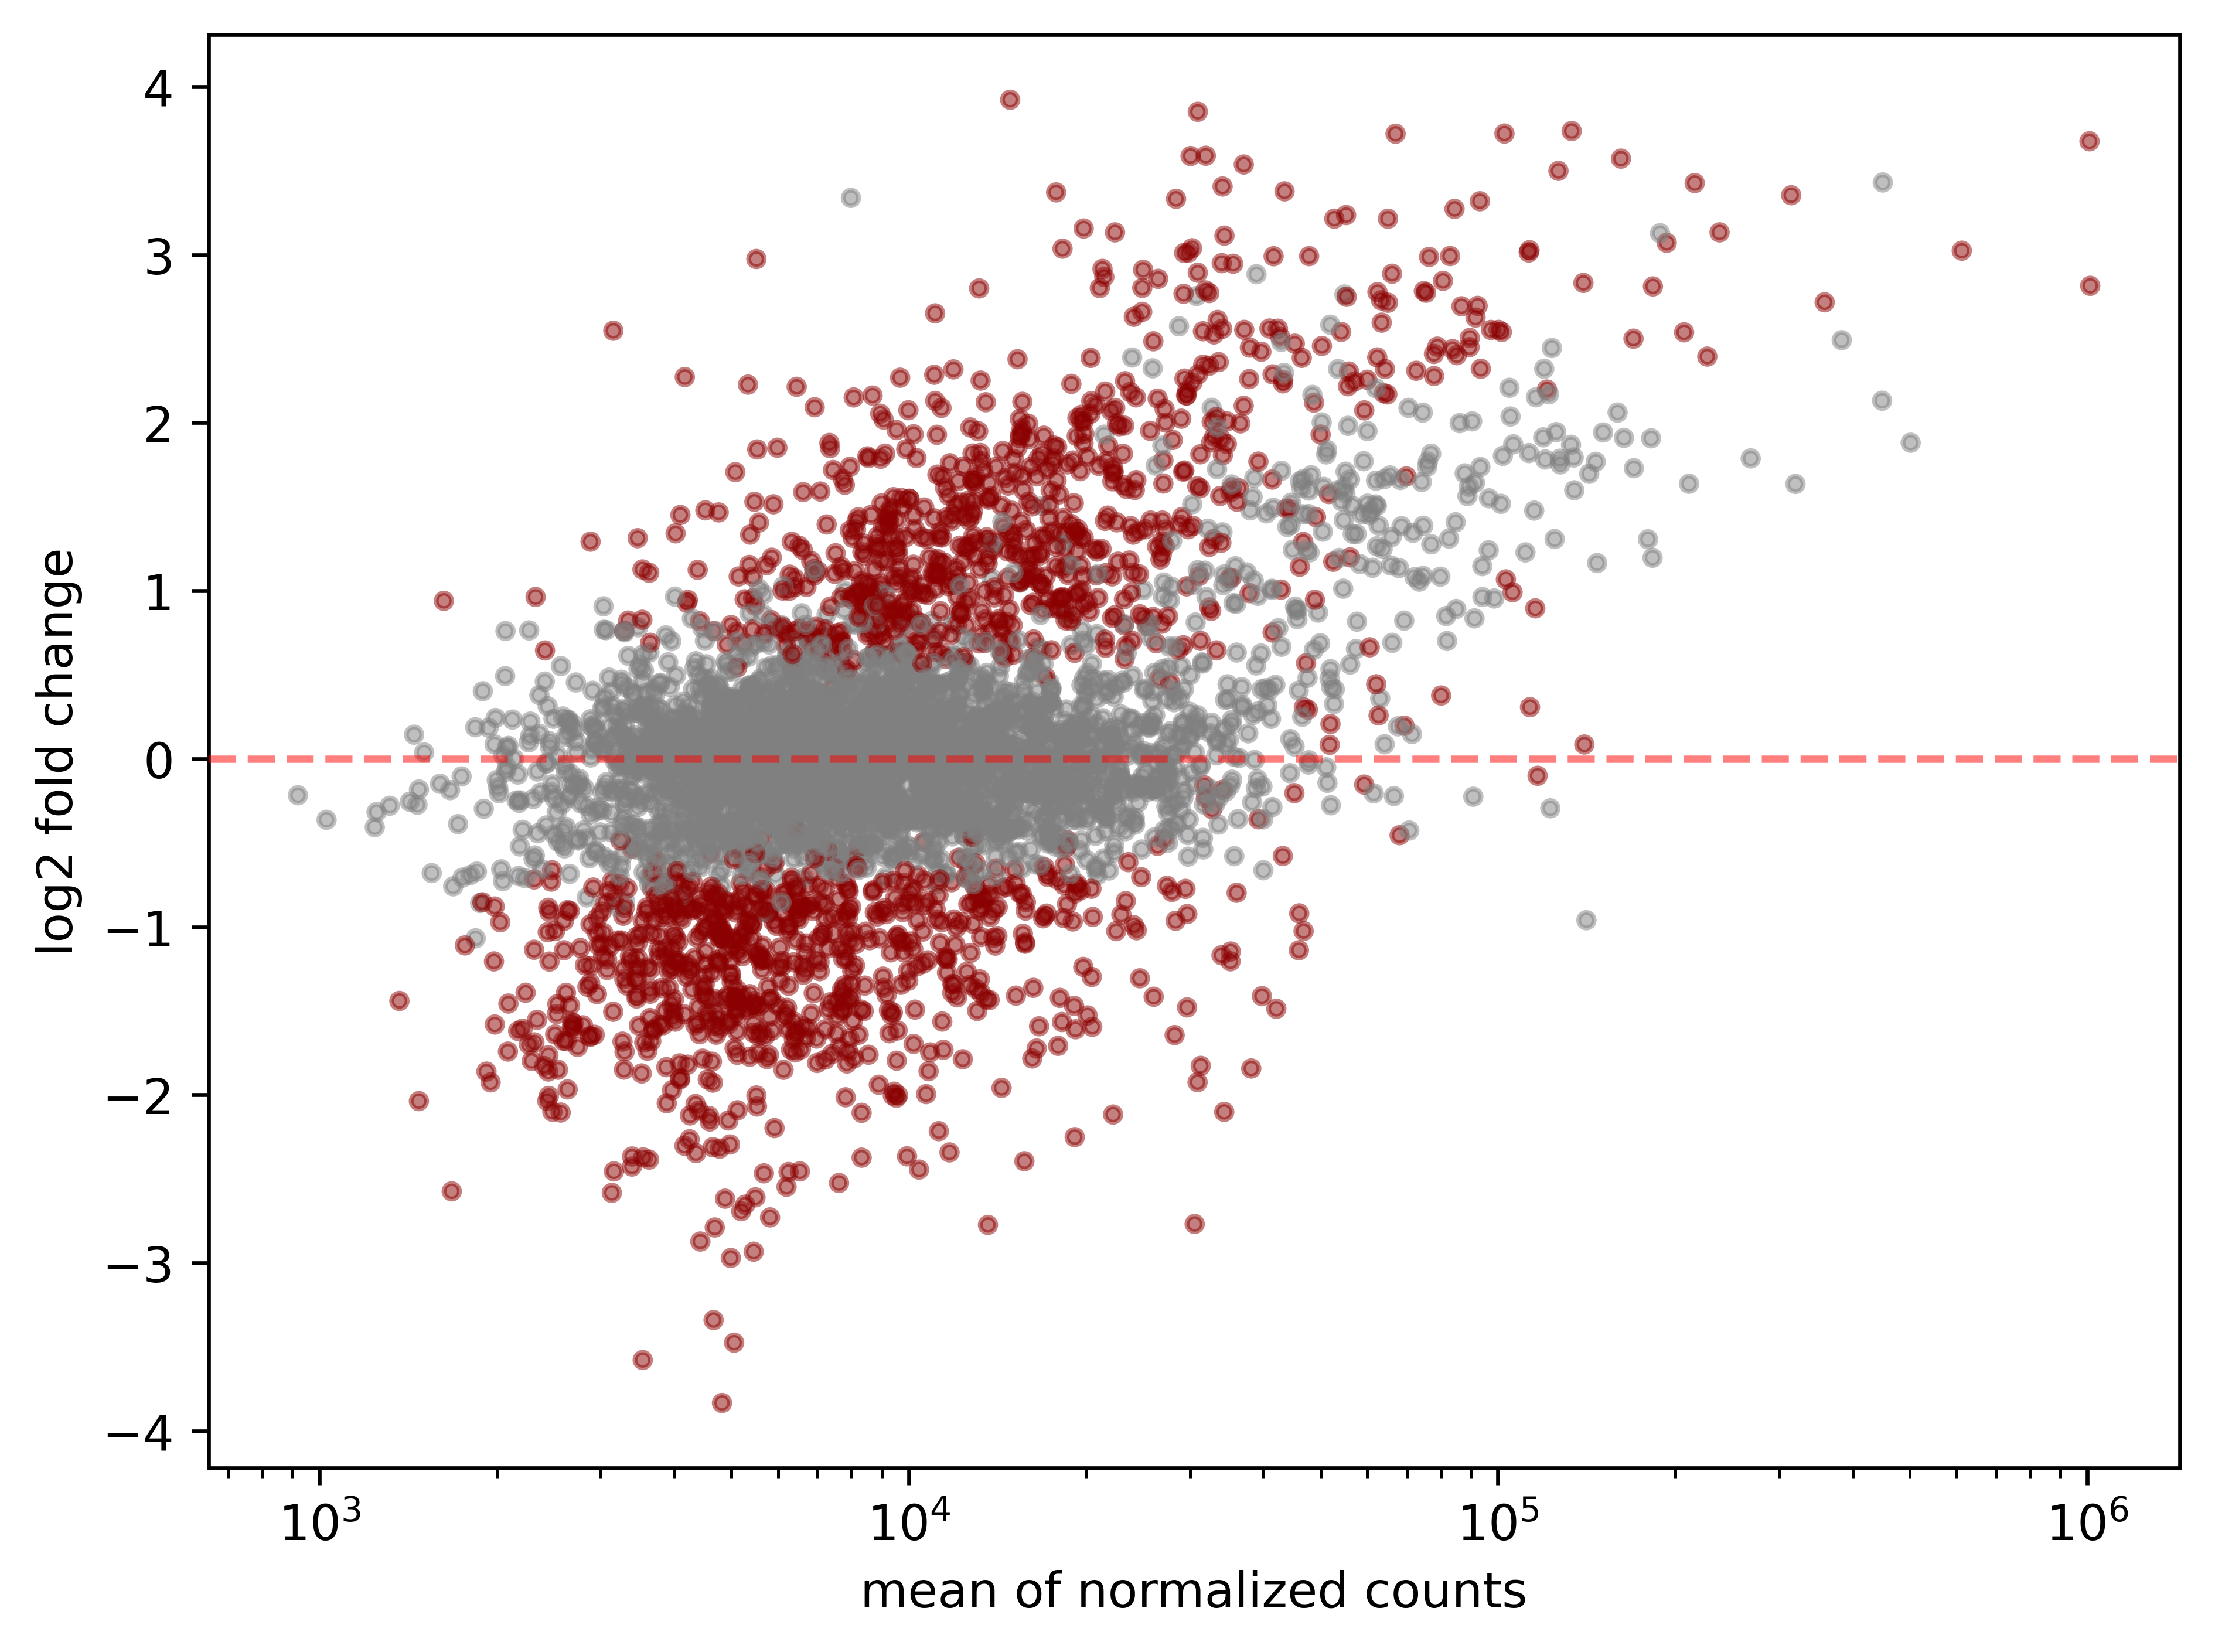

In [81]:
stat_res.plot_MA(s=10)